In [70]:

import pandas as pd
import numpy as np
#import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



In [103]:
tv_ = pd.read_pickle("tv_show.pkl")
tv_.info()

print(tv_[['year_start','year_end']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        168639 non-null  int64         
 1   number_of_seasons         168639 non-null  int64         
 2   number_of_episodes        168639 non-null  int64         
 3   original_language         168639 non-null  int8          
 4   vote_count                168639 non-null  int64         
 5   vote_average              168639 non-null  float64       
 6   overview                  93333 non-null   string        
 7   adult                     168639 non-null  bool          
 8   first_air_date            136903 non-null  datetime64[ns]
 9   last_air_date             138735 non-null  datetime64[ns]
 10  in_production             168639 non-null  bool          
 11  popularity                168639 non-null  float64       
 12  ty

In [105]:
tv_.head(20)
#Adding column for period of each show and removing the date time 

tv_ = tv_.drop(columns = ['last_air_date','first_air_date'])
def aired_t(row):
    if pd.isna(row['year_start']) or pd.isna(row['year_end']) or \
           pd.isna(row['month_start']) or pd.isna(row['month_end']):
            return pd.NA  # Keep NaN values
    
    aired = (row['year_end'] - row['year_start']) * 12 + (row['month_end'] - row['month_start'])
    return aired / 12.0

tv_['aired_time'] =tv_.apply(aired_t, axis=1)
#tv_['aired_time'] = (tv_['last_air_year'] - tv_['first_air_year']) *12 + (tv_['last_air_month'] - tv_['first_air_month'])
#tv_['aired_time']=tv_['aired_time']/12

tv_['aired_time'].head(30)

0      8.083333
1      4.583333
2           6.0
3     12.083333
4      5.666667
5      6.583333
6           0.0
7      5.666667
8      5.666667
9      0.166667
10     8.583333
11    11.666667
12     0.083333
13    18.166667
14     3.416667
15    33.833333
16     2.666667
17     3.333333
18     8.583333
19     4.083333
20          3.0
21          9.0
22          7.5
23     0.083333
24    10.083333
25          6.5
26          0.0
27     9.666667
28    15.166667
29     4.666667
Name: aired_time, dtype: object

# check statistics for string column for best column adjustments 

In [34]:
# A function to find combined network on the same show

def find_coop(row):
    row_num = str(row).split(', ')
    len_row = len(row_num)
    if len_row > 1:
        return 'multiple'
    else:
        return row

networks
NBC           29.765923
ABC           22.927915
multiple      18.043836
Netflix       14.246856
ITV1           7.781501
BBC One        7.593813
other          7.580530
YouTube        5.718837
BBC Two        3.380262
not_assign     1.437834
Name: popularity, dtype: float64


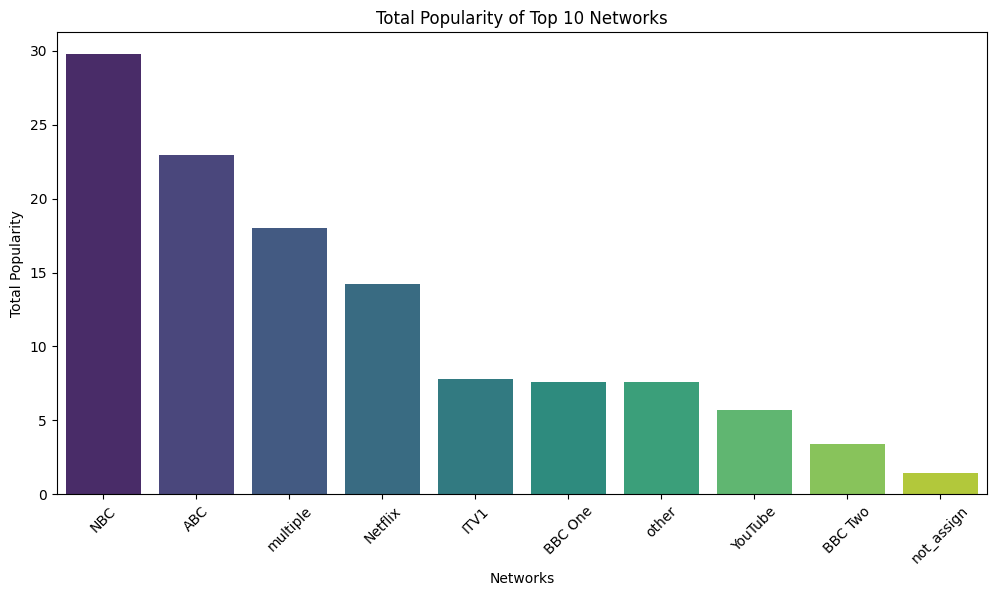

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

#print(tv_['networks'].nunique())
top_10_net = tv_['networks'].value_counts().sort_values(ascending =False).head(10)
filtered_tv = tv_.copy()
filtered_tv['networks'] = filtered_tv['networks'].apply(find_coop)
filtered_tv['networks'] = filtered_tv['networks'].apply(lambda x : x if x in top_10_net.index or x=='multiple' else ('other' if pd.notna(x) else 'not_assign') )

#print(filtered_tv['networks'].head(20))

# checking if grouping and creating new categories helps 
popularity_per_network = filtered_tv.groupby('networks')['popularity'].mean().sort_values(ascending=False)
print(popularity_per_network)

tv_ = filtered_tv

 #Plot the popularity of the top 10 networks
plt.figure(figsize=(12, 6))
sns.barplot(x=popularity_per_network.index, y=popularity_per_network.values,hue =popularity_per_network.index , palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Networks")
plt.ylabel("Total Popularity")
plt.title("Total Popularity of Top 10 Networks")
#sns.scatterplot ( tv_, hue ='networks',x='networks' , y ='popularity') 
plt.show()


## type /status


In [68]:
#print(tv_['type'].isnull().sum())
print(tv_.value_counts('type').sort_values(ascending = False)) # looks fine for dummies
#tv_.info()

#status :
print(tv_.value_counts('status').sort_values(ascending = False))
#print(tv_['status'].isnull().sum())

'''Both columns looks fine to be converted to dummies'''

type
Scripted       129301
Documentary     13864
Miniseries      10810
Reality          9682
Talk Show        2997
Video            1379
News              606
Name: count, dtype: int64
status
Ended               93232
Returning Series    67507
Canceled             4634
In Production        2380
Planned               650
Pilot                 236
Name: count, dtype: int64


'both columns looks fine to be converted to dummies'

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
                

# Handle overview - a numerical connection to popularuty ?

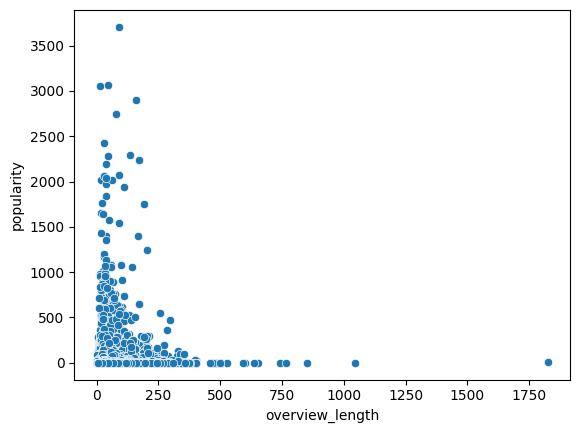

In [78]:
def word_len(row):
    if pd.isna(row):  # Handle NaN values
        return 0 # instead of nan returns 0
    return len(row.split(' '))  # Count words
    
tv_['overview_length'] = tv_['overview'].apply(word_len)

#print(tv_['overview_length'].isnull().sum()) # = 0
#print(tv_['popularity'].isnull().sum()) # = 0



tv_cop = tv_.loc[tv_['overview_length'] !=-0]
# Scatter plot (corrected)
sns.scatterplot(data=tv_cop, x='overview_length', y='popularity')
plt.show()
#sns.scatterplot(data=tv_, x='overview_length', y='popularity')
#plt.show()

In [82]:

#tv_ = tv_.drop(columns = ['id','genres'])
# encoding 
bool_lst = [col for col in tv_.select_dtypes('bool')]
for col in bool_lst :
    tv_[col] = tv_[col].astype(int)
#tv_.info()
    
cols_ = ['type','status','networks']

for col in cols_:
    tv_[col] = tv_[col].astype('category')
    tv_[col] = tv_[col].cat.codes

tv_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   number_of_seasons         168639 non-null  int64  
 1   number_of_episodes        168639 non-null  int64  
 2   original_language         168639 non-null  int8   
 3   vote_count                168639 non-null  int64  
 4   vote_average              168639 non-null  float64
 5   overview                  93333 non-null   string 
 6   adult                     168639 non-null  int64  
 7   in_production             168639 non-null  int64  
 8   popularity                168639 non-null  float64
 9   type                      168639 non-null  int8   
 10  status                    168639 non-null  int8   
 11  networks                  168639 non-null  int8   
 12  origin_country            168639 non-null  int8   
 13  episode_run_time          168639 non-null  i

# Auto viz

In [63]:
tv_.describe()


,id,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,first_air_date,last_air_date,popularity,origin_country,episode_run_time,languages_num,spoken_languages_num,production_countries_num,year_start,month_start,year_end,month_end,overview_length
count,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,136903,136903,168639.000000,168639.000000,168639.000000,110050.000000,109280.000000,77511.000000,136903.000000,136903.000000,136903.000000,136903.000000,168639.000000
mean,111307.074704,1.548497,24.465082,8.383043,13.305054,2.333843,2010-11-18 11:01:02.347793664,2010-11-18 11:01:02.347793664,5.882644,13.314814,22.603348,1.059727,1.052214,1.059063,2010.407230,6.273646,2010.407230,6.273646,31.662439
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1917-01-09 00:00:00,1917-01-09 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1917.000000,1.000000,1917.000000,1.000000,0.000000
25%,45936.500000,1.000000,1.000000,5.000000,0.000000,0.000000,2006-04-28 00:00:00,2006-04-28 00:00:00,0.600000,4.000000,0.000000,1.000000,1.000000,1.000000,2006.000000,3.000000,2006.000000,3.000000,0.000000
50%,97734.000000,1.000000,6.000000,5.000000,0.000000,0.000000,2015-10-02 00:00:00,2015-10-02 00:00:00,0.857000,12.000000,0.000000,1.000000,1.000000,1.000000,2015.000000,6.000000,2015.000000,6.000000,15.000000
75%,196923.500000,1.000000,20.000000,11.000000,1.000000,6.000000,2020-10-01 00:00:00,2020-10-01 00:00:00,2.431500,26.000000,42.000000,1.000000,1.000000,1.000000,2020.000000,9.000000,2020.000000,9.000000,48.000000
max,251213.000000,240.000000,20839.000000,20.000000,21857.000000,10.000000,2046-02-24 00:00:00,2046-02-24 00:00:00,3707.008000,27.000000,6032.000000,12.000000,12.000000,22.000000,2046.000000,12.000000,2046.000000,12.000000,1826.000000
std,76451.662352,2.942872,134.799622,5.247124,190.809059,3.454334,NaN,NaN,42.023216,10.016977,47.950427,0.312405,0.294380,0.366752,13.867263,3.560848,13.867263,3.560848,44.516853
